In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import tree
import autokeras as ak
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import tensorflow
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
new_path = os.path.join(os.getcwd(),'data_Xentech_copy')
new_path

f_lists = os.listdir(new_path)
print("File Lists : ", f_lists)

File Lists :  ['data-2022.09.06.csv', 'data-2022.09.07.csv', 'data-2022.09.08.csv', 'data-2022.09.09.csv', 'data-2022.09.10.csv', 'data-2022.09.13.csv', 'data-2022.09.14.csv', 'data-2022.09.15.csv', 'data-2022.09.16.csv', 'data-2022.09.17.csv', 'data-2022.09.23.csv', 'data-2022.09.24.csv', 'data-2022.09.27.csv', 'data-2022.09.28.csv', 'data-2022.09.29.csv', 'data-2022.09.30.csv', 'data-2022.10.01.csv', 'data-2022.10.05.csv', 'data-2022.10.06.csv', 'data-2022.10.07.csv', 'data-2022.10.08.csv', 'data-2022.10.12.csv', 'data-2022.10.13.csv', 'data-2022.10.14.csv', 'data-2022.10.15.csv', 'data-2022.10.18.csv', 'data-2022.10.19.csv', 'data-2022.10.20.csv', 'data-2022.10.21.csv', 'data-2022.10.22.csv', 'data-2022.10.25.csv', 'data-2022.10.26.csv', 'data-2022.10.27.csv', 'Error Lot list.csv']


In [3]:
dataList=list()
cnt = 0

for pth in glob.glob(new_path+'/*')[:-1]:
    origin = pd.read_csv(pth,index_col=False)
    origin['Date'] = "-".join(pth.split('-')[-1].split(".")[:-1])
    cnt = cnt+len(origin)
    dataList.append(origin)

CatList=pd.concat(dataList,axis=0,ignore_index=True)
CatList

,Index,Lot,Time,pH,Temp,Current,Date
0,1,1,오후 4:29:15.0,10.37,42.87,7.34,2022-09-06
1,2,1,오후 4:29:20.0,10.90,42.70,8.26,2022-09-06
2,3,1,오후 4:29:25.0,9.61,42.37,8.46,2022-09-06
3,4,1,오후 4:29:30.0,10.32,45.85,8.04,2022-09-06
4,5,1,오후 4:29:35.0,10.36,44.18,7.23,2022-09-06
...,...,...,...,...,...,...,...
50089,1514,22,오후 6:39:05.9,9.79,43.52,8.55,2022-10-27
50090,1515,22,오후 6:39:10.9,9.53,44.44,7.36,2022-10-27
50091,1516,22,오후 6:39:15.9,9.86,46.54,8.15,2022-10-27
50092,1517,22,오후 6:39:20.9,10.52,47.88,7.97,2022-10-27


In [4]:
df = CatList.drop(['Index','Time'], axis=1, inplace=False)
df

,Lot,pH,Temp,Current,Date
0,1,10.37,42.87,7.34,2022-09-06
1,1,10.90,42.70,8.26,2022-09-06
2,1,9.61,42.37,8.46,2022-09-06
3,1,10.32,45.85,8.04,2022-09-06
4,1,10.36,44.18,7.23,2022-09-06
...,...,...,...,...,...
50089,22,9.79,43.52,8.55,2022-10-27
50090,22,9.53,44.44,7.36,2022-10-27
50091,22,9.86,46.54,8.15,2022-10-27
50092,22,10.52,47.88,7.97,2022-10-27


In [5]:
df.shape

(50094, 5)

In [6]:
df.describe()

,Lot,pH,Temp,Current
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,11.500000,10.273346,45.023847,7.974549
std,6.344352,0.453278,1.661687,0.601907
min,1.000000,9.510000,42.010000,5.510000
25%,6.000000,9.900000,43.670000,7.500000
50%,11.500000,10.260000,45.020000,7.990000
75%,17.000000,10.630000,46.360000,8.470000
max,22.000000,11.990000,51.980000,8.990000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50094 entries, 0 to 50093
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lot      50094 non-null  int64  
 1   pH       50094 non-null  float64
 2   Temp     50094 non-null  float64
 3   Current  50094 non-null  float64
 4   Date     50094 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


In [8]:
df.isnull().sum()

Lot        0
pH         0
Temp       0
Current    0
Date       0
dtype: int64

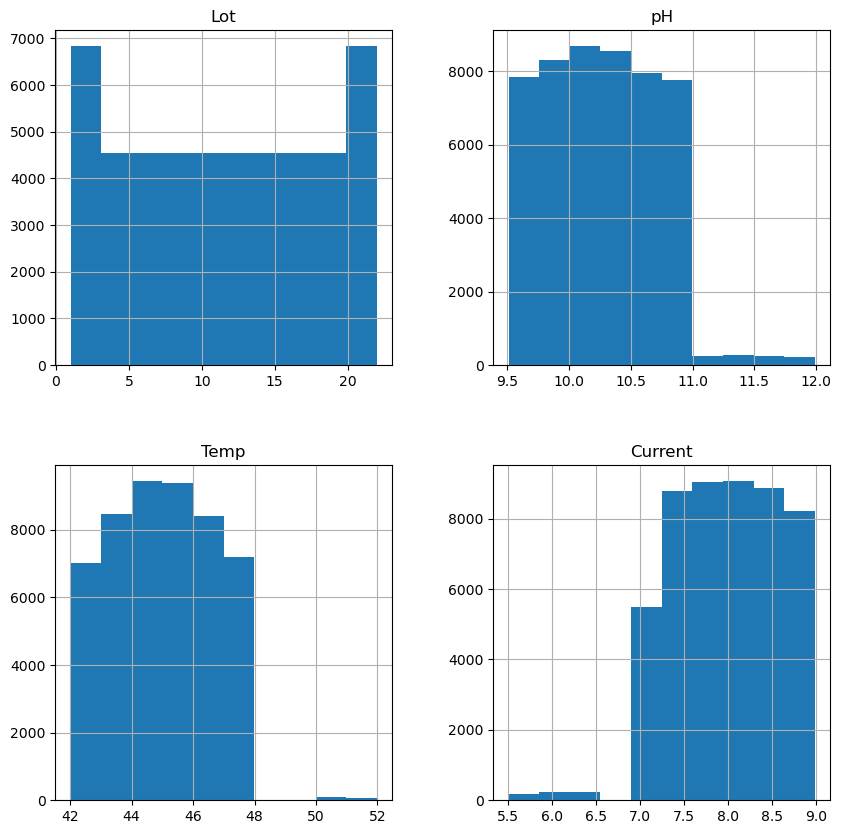

In [9]:
df.hist(figsize=(10,10))
plt.show()

In [10]:
corr_matrix = df.corr()
corr_matrix

,Lot,pH,Temp,Current
Lot,1.000000,-0.001241,-0.001545,-0.004212
pH,-0.001241,1.000000,0.001407,-0.026063
Temp,-0.001545,0.001407,1.000000,-0.000786
Current,-0.004212,-0.026063,-0.000786,1.000000


<Axes: >

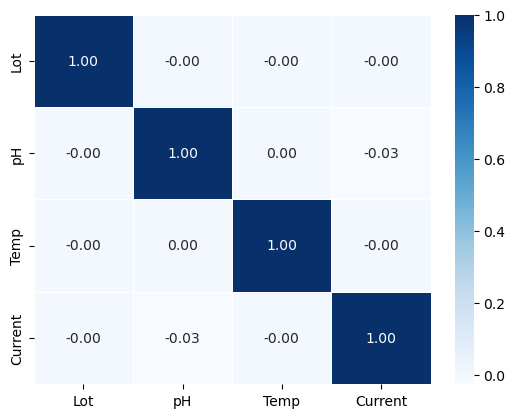

In [11]:
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [12]:
lot_lists = df['Lot'].unique()
lot_lists

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [13]:
d_lists = df['Date'].unique()
d_lists

array(['2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09',
       '2022-09-10', '2022-09-13', '2022-09-14', '2022-09-15',
       '2022-09-16', '2022-09-17', '2022-09-23', '2022-09-24',
       '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30',
       '2022-10-01', '2022-10-05', '2022-10-06', '2022-10-07',
       '2022-10-08', '2022-10-12', '2022-10-13', '2022-10-14',
       '2022-10-15', '2022-10-18', '2022-10-19', '2022-10-20',
       '2022-10-21', '2022-10-22', '2022-10-25', '2022-10-26',
       '2022-10-27'], dtype=object)

In [19]:
df_er = pd.read_csv(glob.glob(new_path+'/*')[-1],index_col=False)
df_er

,Index,Date,LoT,LoT2
0,1,2022-09-06,NaN,NaN
1,2,2022-09-07,13.0,NaN
2,3,2022-09-08,NaN,NaN
3,4,2022-09-09,NaN,NaN
4,5,2022-09-10,NaN,NaN
5,6,2022-09-13,NaN,NaN
6,7,2022-09-14,5.0,NaN
7,8,2022-09-15,5.0,NaN
8,9,2022-09-16,NaN,NaN
9,10,2022-09-17,NaN,NaN


In [20]:
er_drop = df_er.dropna(thresh=3, axis=0)
lot_er_list = er_drop['LoT'].unique()
lot_er_list

array([13.,  5.,  9.,  8., 17., 19., 14.,  1., 15.])

In [21]:
d_er_list = er_drop['Date'].unique()
d_er_list

array(['2022-09-07', '2022-09-14', '2022-09-15', '2022-09-23',
       '2022-09-29', '2022-10-01', '2022-10-05', '2022-10-06',
       '2022-10-08', '2022-10-20', '2022-10-22', '2022-10-25',
       '2022-10-26'], dtype=object)

In [22]:
df_total = pd.DataFrame(columns=['pH','Temp','Current','NG'])

In [23]:
for d in d_lists:
    for lot in lot_lists:
        tmp = df[(df['Date']==d)&(df['Lot']==lot)]
        tmp = tmp[['pH', 'Temp','Current']]
        er_df = er_drop[(er_drop['Date']==d)&
                              ((er_drop['LoT']==lot)|(er_drop['LoT2']==lot))]
        len_error = len(er_df)
        if len_error>0:
            trr = np.full((tmp['pH'].shape), 1)
        else:
            trr = np.full((tmp['pH'].shape), 0)
        tmp['NG'] = trr
        df_total = df_total.append(tmp)
df_total =  df_total.apply(pd.to_numeric)
df_total

,pH,Temp,Current,NG
0,10.37,42.87,7.34,0
1,10.90,42.70,8.26,0
2,9.61,42.37,8.46,0
3,10.32,45.85,8.04,0
4,10.36,44.18,7.23,0
...,...,...,...,...
50089,9.79,43.52,8.55,0
50090,9.53,44.44,7.36,0
50091,9.86,46.54,8.15,0
50092,10.52,47.88,7.97,0


In [24]:
df_total.describe()

,pH,Temp,Current,NG
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,10.273346,45.023847,7.974549,0.020661
std,0.453278,1.661687,0.601907,0.142249
min,9.510000,42.010000,5.510000,0.000000
25%,9.900000,43.670000,7.500000,0.000000
50%,10.260000,45.020000,7.990000,0.000000
75%,10.630000,46.360000,8.470000,0.000000
max,11.990000,51.980000,8.990000,1.000000


In [25]:
df_total.corr()

,pH,Temp,Current,NG
pH,1.000000,0.001407,-0.026063,0.026743
Temp,0.001407,1.000000,-0.000786,0.011250
Current,-0.026063,-0.000786,1.000000,-0.014376
NG,0.026743,0.011250,-0.014376,1.000000


<Axes: >

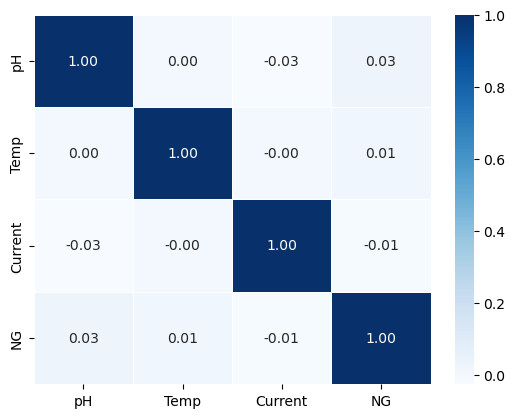

In [26]:
sns.heatmap(df_total.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [28]:
corr_matrix = df_total.corr()
corr_matrix["NG"].sort_values(ascending=False)

NG         1.000000
pH         0.026743
Temp       0.011250
Current   -0.014376
Name: NG, dtype: float64

In [29]:
df_total_copy = df_total.copy()

In [30]:
df_total_copy["ratio"] = df_total["pH"] / df_total["Current"]

In [32]:
corr_matrix = df_total_copy.corr()
corr_matrix["NG"].sort_values(ascending=False)

NG         1.000000
ratio      0.028735
pH         0.026743
Temp       0.011250
Current   -0.014376
Name: NG, dtype: float64

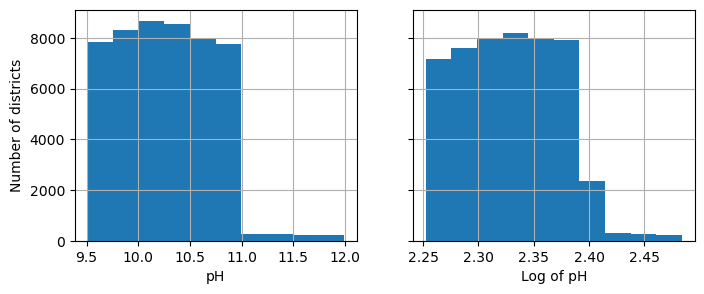

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df_total["pH"].hist(ax=axs[0], bins=10)
df_total["pH"].apply(np.log).hist(ax=axs[1], bins=10)
axs[0].set_xlabel("pH")
axs[1].set_xlabel("Log of pH")
axs[0].set_ylabel("Number of districts")
plt.show()

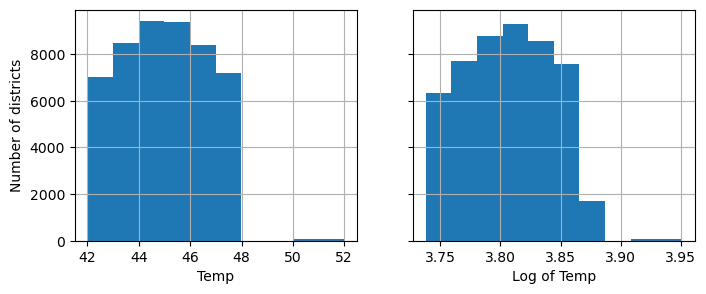

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df_total["Temp"].hist(ax=axs[0], bins=10)
df_total["Temp"].apply(np.log).hist(ax=axs[1], bins=10)
axs[0].set_xlabel("Temp")
axs[1].set_xlabel("Log of Temp")
axs[0].set_ylabel("Number of districts")
plt.show()

In [54]:
train_data, test_data = train_test_split(df_total, test_size=0.2)

In [62]:
X_train = train_data[['pH','Temp','Current']]
Y_train = train_data[['passorfail']]
X_test = test_data[['pH','Temp','Current']]
Y_test = test_data[['passorfail']]

In [51]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        MinMaxScaler())

log_pipeline = make_pipeline(
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    MinMaxScaler())

log_pipeline

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(feature_names_out='one-to-one',
                                     func=<ufunc 'log'>)),
                ('minmaxscaler', MinMaxScaler())])

In [52]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([
    ("pH_per_Current", ratio_pipeline(), ["pH", "Current"]),
    ("log", log_pipeline, ['pH','Temp'])], 
    remainder=MinMaxScaler()) 

preprocessing

ColumnTransformer(remainder=MinMaxScaler(),
                  transformers=[('pH_per_Current',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['pH', 'Current']),
                                ('log',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log'>)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['pH', 'Temp'])])

In [57]:
from sklearn.linear_model import LogisticRegression

logistic_reg = make_pipeline(preprocessing, LogisticRegression())
logistic_reg.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('pH_per_Current',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['pH', 'Current']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['pH', 'Temp'])])),
                ('logisticregression', LogisticRegression())])

In [58]:
from sklearn.tree import DecisionTreeClassifier 

classifier = make_pipeline(preprocessing, DecisionTreeClassifier())
classifier.fit(X_train,Y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('pH_per_Current',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['pH', 'Current']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['pH', 'Temp'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [59]:
from sklearn.ensemble import RandomForestClassifier 

random_classifier = make_pipeline(preprocessing, RandomForestClassifier())
random_classifier.fit(X_train,Y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('pH_per_Current',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['pH', 'Current']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['pH', 'Temp'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = make_pipeline(preprocessing, AdaBoostClassifier())
ada_classifier.fit(X_train,Y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('pH_per_Current',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['pH', 'Current']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['pH', 'Temp'])])),
                ('adaboostclassifier', AdaBoostClassifier())])

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

predict_logistic_reg = logistic_reg.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(Y_test, predict_logistic_reg)) 
print("Accuracy:", accuracy_score(Y_test, predict_logistic_reg))

Confusion Matrix:  [[   0  204]
 [   0 9815]]
Accuracy: 0.9796386864956582


In [64]:
predict_classifier = classifier.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(Y_test, predict_classifier)) 
print("Accuracy:", accuracy_score(Y_test, predict_classifier))

Confusion Matrix:  [[  11  193]
 [ 285 9530]]
Accuracy: 0.9522906477692384


[0.9582792693881625, 0.941211697774229, 0.9737498752370496, 0.9695578401038027, 0.9760455135243038, 0.9739494959576804, 0.9770436171274578, 0.9762451342449346, 0.9775426689290349, 0.9766443756861962, 0.9777422896496656, 0.9774428585687195, 0.9779419103702964, 0.977343048208404, 0.9777422896496656, 0.9772432378480886, 0.9777422896496656, 0.9776424792893502, 0.9780417207306118, 0.9778421000099811, 0.9782413414512426, 0.9780417207306118, 0.9782413414512426, 0.9780417207306118, 0.9782413414512426, 0.9782413414512426, 0.9784409621718735, 0.978341151811558, 0.9785407725321889, 0.9782413414512426, 0.9784409621718735, 0.978341151811558, 0.9784409621718735, 0.978341151811558, 0.9785407725321889, 0.978341151811558, 0.9784409621718735, 0.978341151811558, 0.9784409621718735, 0.978341151811558, 0.9784409621718735, 0.978341151811558, 0.978341151811558, 0.978341151811558, 0.978341151811558, 0.9782413414512426, 0.9784409621718735, 0.9782413414512426, 0.978341151811558]


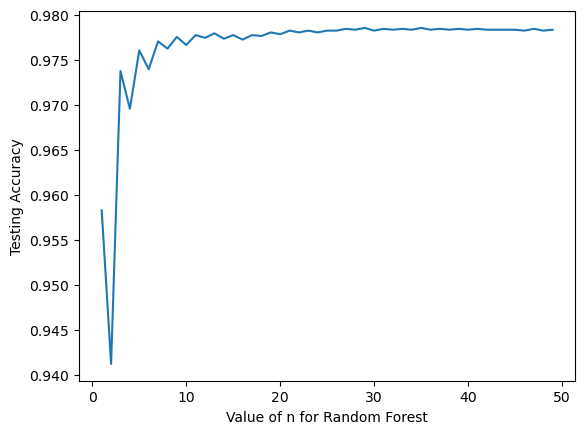

In [65]:
n_range = range(1, 50) 
accuracy_scores = []

for n in n_range:
    random_classifier = make_pipeline(preprocessing, RandomForestClassifier(random_state=0, n_estimators=n))
    random_classifier.fit(X_train,Y_train)
    predict_random_classifier = random_classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(Y_test, predict_random_classifier)) 
print(accuracy_scores)

import matplotlib.pyplot as plt
plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

In [70]:
# n_estimators=35 파라미터 확정

random_classifier = make_pipeline(preprocessing, RandomForestClassifier(random_state=0, n_estimators=35))
random_classifier.fit(X_train,Y_train)
predict_random_classifier = random_classifier.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(Y_test, predict_random_classifier)) 
print("Accuracy:", accuracy_score(Y_test, predict_random_classifier))

Confusion Matrix:  [[   2  202]
 [  13 9802]]
Accuracy: 0.9785407725321889


[0.9796386864956582, 0.9795388761353429, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.979339255414712, 0.979339255414712, 0.979339255414712, 0.9795388761353429, 0.9795388761353429, 0.9795388761353429, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275, 0.9794390657750275]


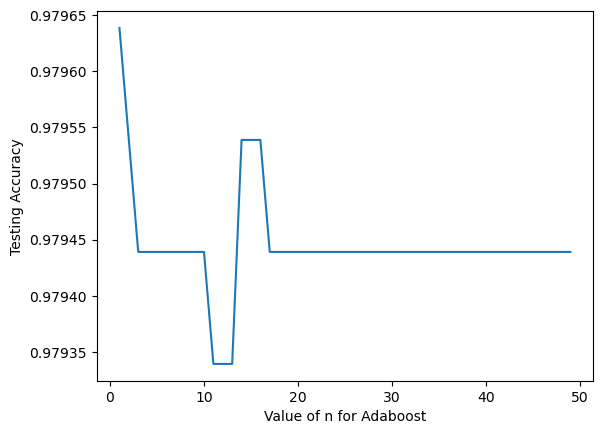

In [71]:
n_range = range(1, 50) 
accuracy_scores = []

for n in n_range:
    ada_classifier = make_pipeline(preprocessing, AdaBoostClassifier(random_state=0, n_estimators=n))
    ada_classifier.fit(X_train,Y_train)
    predict_ada_classifier = ada_classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(Y_test, predict_ada_classifier)) 
print(accuracy_scores)

import matplotlib.pyplot as plt
plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Adaboost')
plt.ylabel('Testing Accuracy')
plt.show()

In [73]:
# n_estimators=0 파라미터 확정

ada_classifier = make_pipeline(preprocessing, AdaBoostClassifier(random_state=0, n_estimators=1))
ada_classifier.fit(X_train,Y_train)
predict_ada_classifier = ada_classifier.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(Y_test, predict_ada_classifier)) 
print("Accuracy:", accuracy_score(Y_test, predict_ada_classifier))

Confusion Matrix:  [[   0  204]
 [   0 9815]]
Accuracy: 0.9796386864956582


Logistic Regression
precision: 0.9796386864956582 recall: 1.0
F1-Score: 0.9897146314409601 Accuracy: 0.9796386864956582


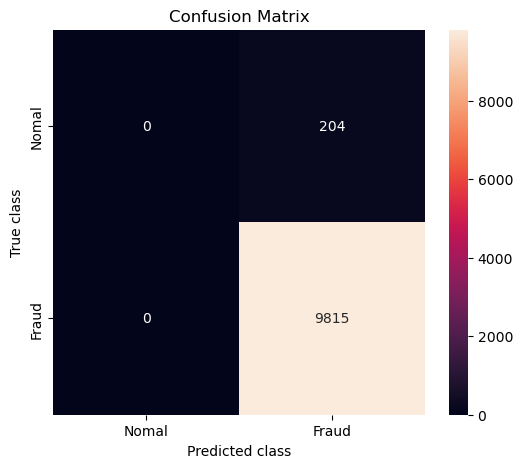

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

result = {}

#예측도
precision_logistic_reg = precision_score(Y_test, predict_logistic_reg)
#재현율
recall_logistic_reg = recall_score(Y_test, predict_logistic_reg)
#F1 Score
f1_logistic_reg = f1_score(Y_test, predict_logistic_reg)
#정확도
acc_logistic_reg = accuracy_score(Y_test, predict_logistic_reg)
#오차 행렬
cm_logistic_reg = confusion_matrix(Y_test, predict_logistic_reg)
result['Logistic Regression'] = {'precision':precision_logistic_reg, 'recall':recall_logistic_reg, 'f1-score':f1_logistic_reg, 'accuracy':acc_logistic_reg}
print(f'Logistic Regression\nprecision: {precision_logistic_reg} recall: {recall_logistic_reg}\nF1-Score: {f1_logistic_reg} Accuracy: {acc_logistic_reg}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logistic_reg, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Decision Tree
precision: 0.9801501594158182 recall: 0.9709628120224146
F1-Score: 0.9755348551540588 Accuracy: 0.9522906477692384


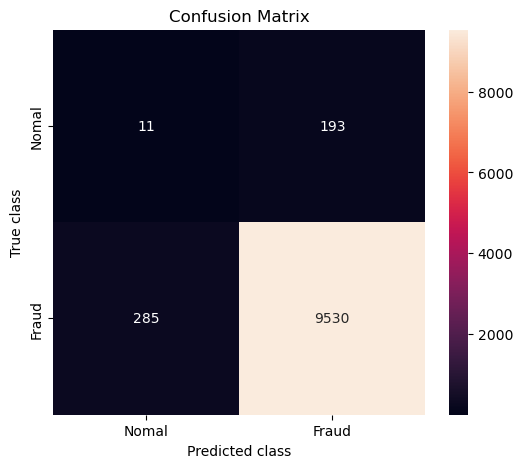

In [75]:
#예측도
precision_classifier = precision_score(Y_test, predict_classifier)
#재현율
recall_classifier = recall_score(Y_test, predict_classifier)
#F1 Score
f1_classifier = f1_score(Y_test, predict_classifier)
#정확도
acc_classifier = accuracy_score(Y_test, predict_classifier)
#오차 행렬
cm_classifier = confusion_matrix(Y_test, predict_classifier)
result['Decision Tree'] = {'precision':precision_classifier, 'recall':recall_classifier, 'f1-score':f1_classifier, 'accuracy':acc_classifier}
print(f'Decision Tree\nprecision: {precision_classifier} recall: {recall_classifier}\nF1-Score: {f1_classifier} Accuracy: {acc_classifier}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_classifier, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Random Forest
precision: 0.9798080767692923 recall: 0.9986754966887417
F1-Score: 0.9891518240072656 Accuracy: 0.9785407725321889


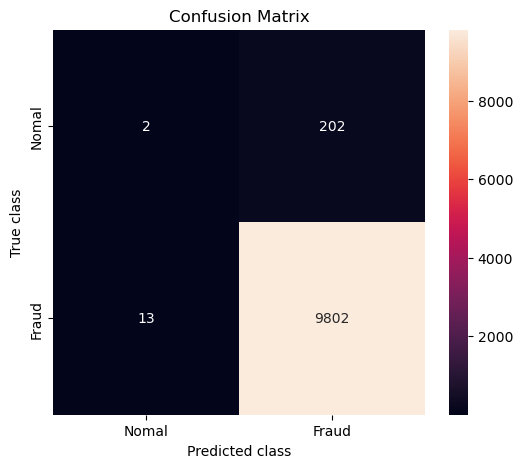

In [76]:
#예측도
precision_random_classifier = precision_score(Y_test, predict_random_classifier)
#재현율
recall_random_classifier = recall_score(Y_test, predict_random_classifier)
#F1 Score
f1_random_classifier = f1_score(Y_test, predict_random_classifier)
#정확도
acc_random_classifier = accuracy_score(Y_test, predict_random_classifier)
#오차 행렬
cm_random_classifier = confusion_matrix(Y_test, predict_random_classifier)
result['Random Forest'] = {'precision':precision_random_classifier, 'recall':recall_random_classifier, 'f1-score':f1_random_classifier, 'accuracy':acc_random_classifier}
print(f'Random Forest\nprecision: {precision_random_classifier} recall: {recall_random_classifier}\nF1-Score: {f1_random_classifier} Accuracy: {acc_random_classifier}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_random_classifier, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

AdaBoost
precision: 0.9796386864956582 recall: 1.0
F1-Score: 0.9897146314409601 Accuracy: 0.9796386864956582


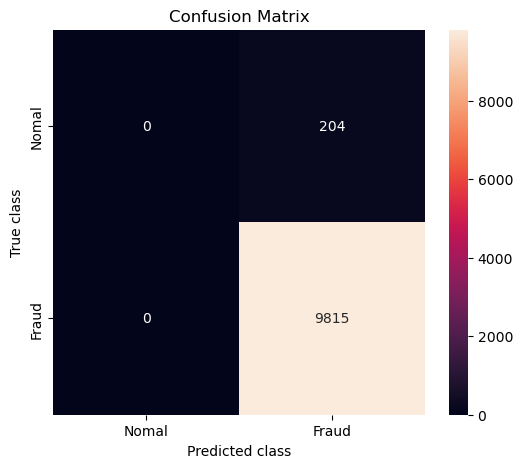

In [77]:
#예측도
precision_ada_classifier = precision_score(Y_test, predict_ada_classifier)
#재현율
recall_ada_classifier = recall_score(Y_test, predict_ada_classifier)
#F1 Score
f1_ada_classifier = f1_score(Y_test, predict_ada_classifier)
#정확도
acc_ada_classifier = accuracy_score(Y_test, predict_ada_classifier)
#오차 행렬
cm_ada_classifier = confusion_matrix(Y_test, predict_ada_classifier)
result['AdaBoost'] = {'precision':precision_ada_classifier, 'recall':recall_ada_classifier, 'f1-score':f1_ada_classifier, 'accuracy':acc_ada_classifier}
print(f'AdaBoost\nprecision: {precision_ada_classifier} recall: {recall_ada_classifier}\nF1-Score: {f1_ada_classifier} Accuracy: {acc_ada_classifier}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ada_classifier, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [78]:
pd.DataFrame(result).T

,precision,recall,f1-score,accuracy
Logistic Regression,0.979639,1.000000,0.989715,0.979639
Decision Tree,0.980150,0.970963,0.975535,0.952291
Random Forest,0.979808,0.998675,0.989152,0.978541
AdaBoost,0.979639,1.000000,0.989715,0.979639
